In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Summary statistics for numerical columns
summary_stats = df.describe().T  # Transpose for better readability

# Add median manually
summary_stats['median'] = df.median(numeric_only=True)

# Display summary statistics
print(summary_stats)


             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max    median  
PassengerId  891.0000  446.0000  
Survived       1.0000    0.0000  
Pclass         3.0000    3.0000  
Age           80.0000   28.0000  
SibSp          8.0000    0.0000  
Parch          6.0000    0.0000  
Fare         512.3292   14.4542  


#** Create histograms and boxplots for numeric features.**

📊 Histograms for Numerical Features:


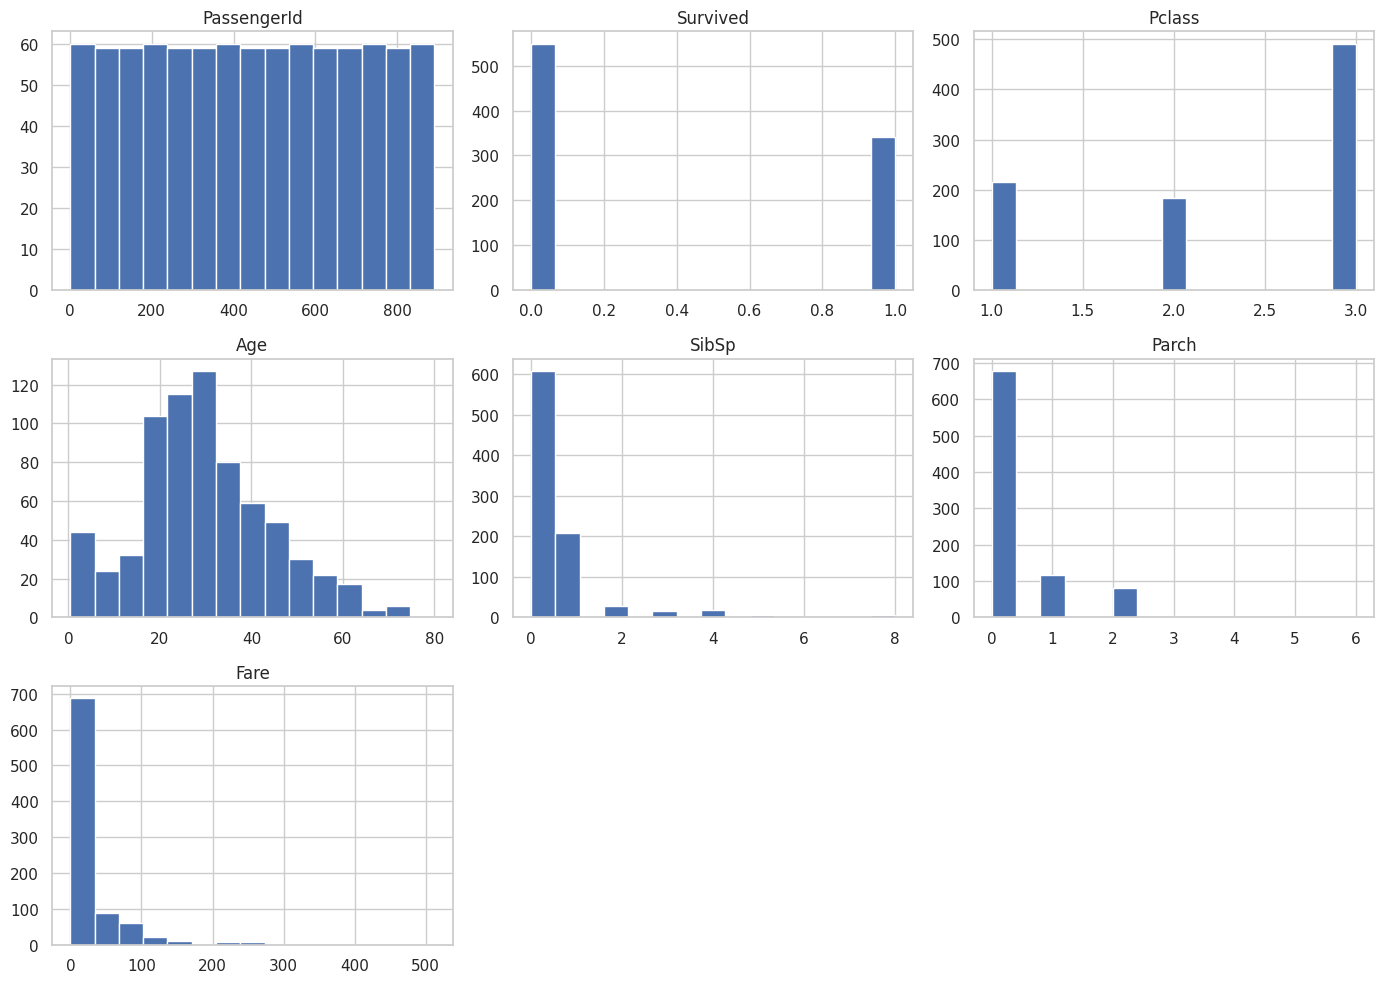

📦 Boxplots for Numerical Features:


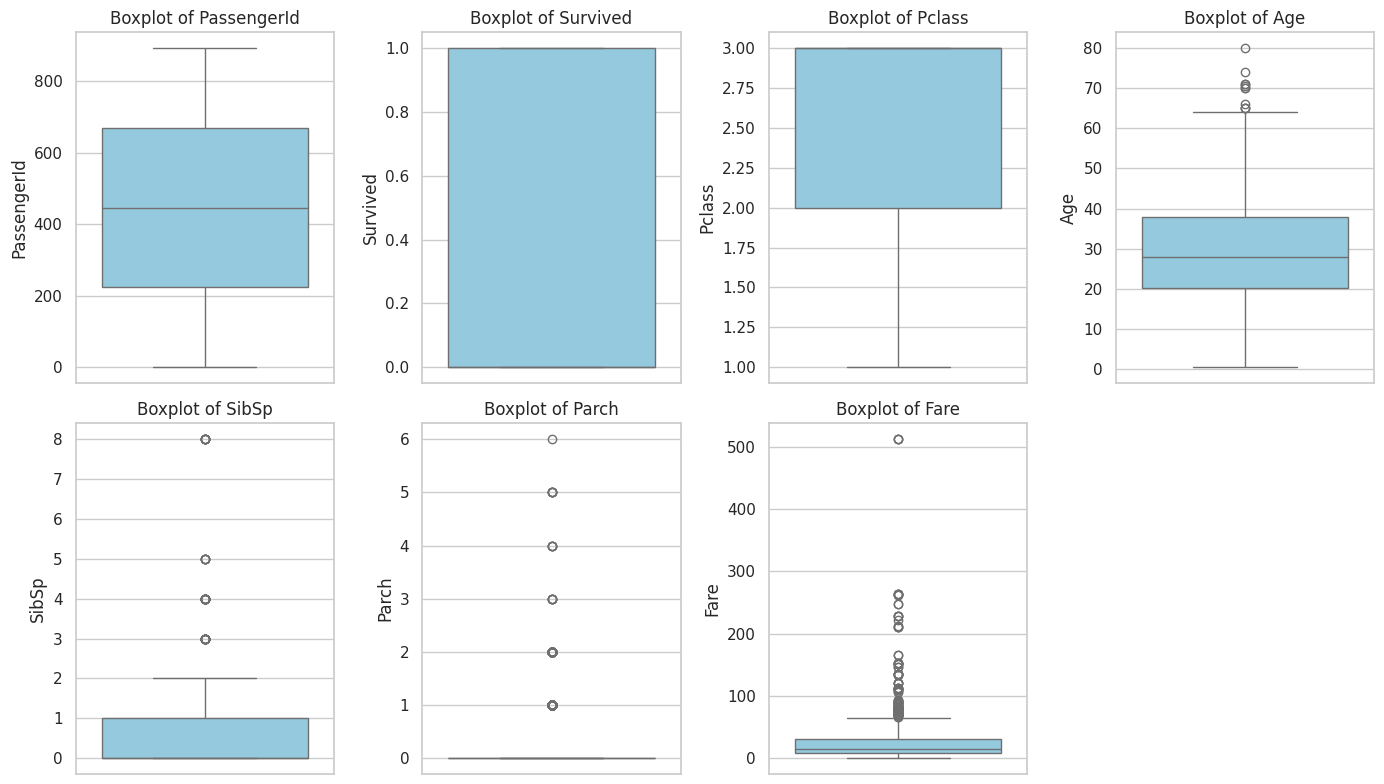

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set plot style
sns.set(style="whitegrid")

# Create histograms
print("📊 Histograms for Numerical Features:")
df[numeric_cols].hist(bins=15, figsize=(14, 10), layout=(len(numeric_cols)//3 + 1, 3))
plt.tight_layout()
plt.show()

# Create boxplots
print("📦 Boxplots for Numerical Features:")
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, (len(numeric_cols) + 1) // 2, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# **Use pairplot/correlation matrix for feature relationships.**1. Correlation Matrix Heatmap



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


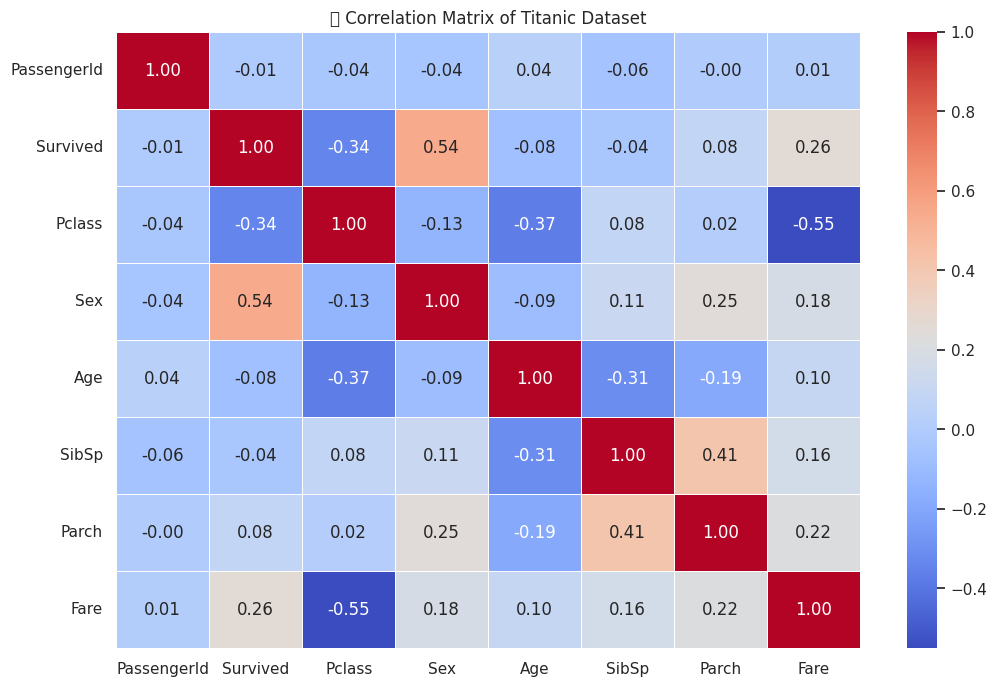

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Encode categorical variable for correlation analysis
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # If not already done
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("🔗 Correlation Matrix of Titanic Dataset")
plt.show()

# **2. Pairplot (Pairwise Relationships)**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


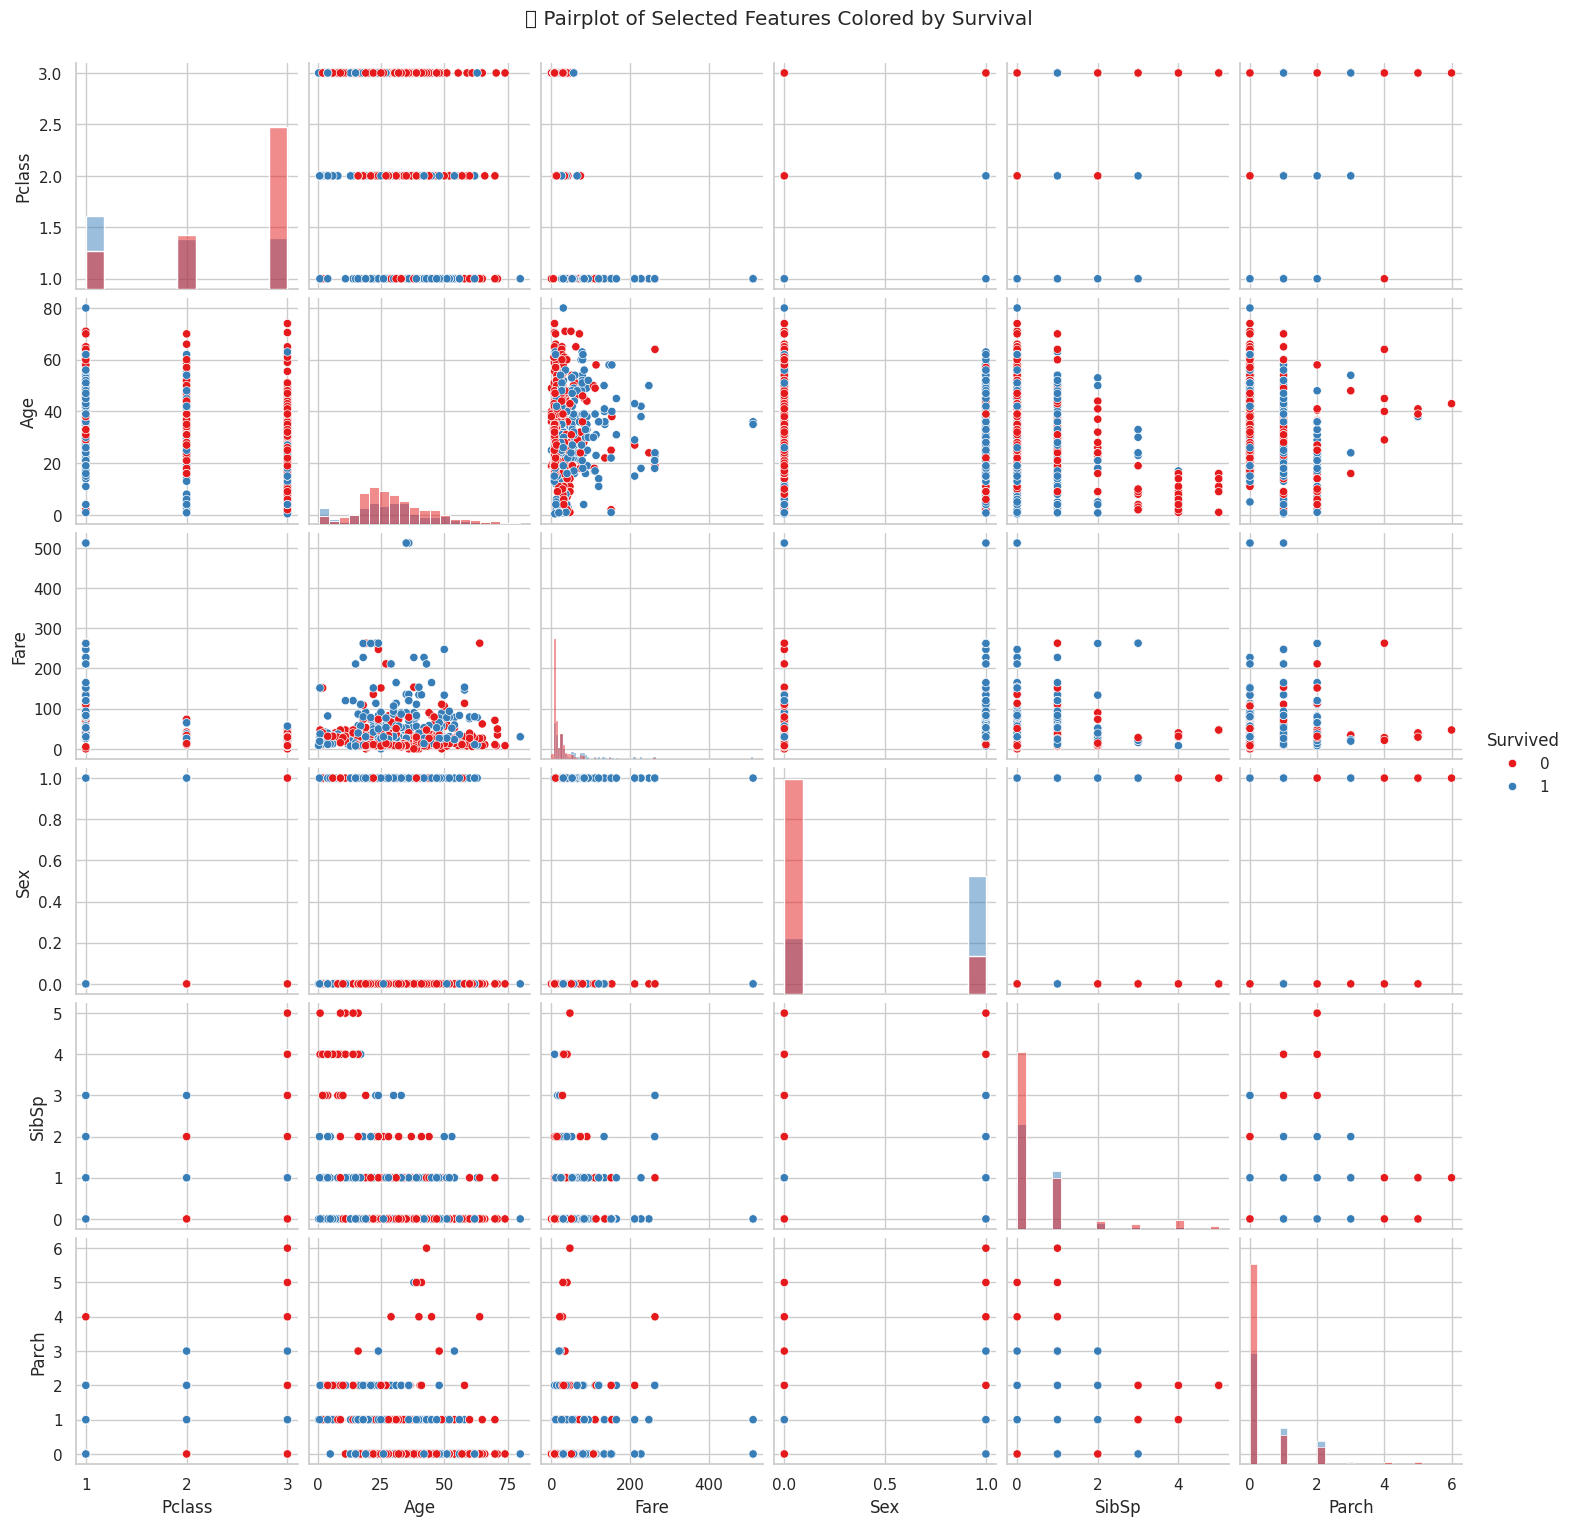

In [ ]:
from seaborn import pairplot

# Optional: Select a subset of features for clarity
selected_cols = ['Survived', 'Pclass', 'Age', 'Fare', 'Sex', 'SibSp', 'Parch']
df_subset = df[selected_cols].dropna()  # Drop rows with missing values

# Create pairplot
sns.pairplot(df_subset, hue='Survived', diag_kind='hist', palette='Set1')
plt.suptitle("🔍 Pairplot of Selected Features Colored by Survival", y=1.02)
plt.show()


# **Identify patterns, trends, or anomalies in the data.**

🔍 1. Survival Trends by Gender
Sex is highly predictive:

Female passengers had a much higher survival rate.

Seen in both correlation matrix and pairplot: Sex correlates positively with Survived.

🔍 2. Class and Survival Relationship
Pclass (Passenger Class) is negatively correlated with survival:

Passengers in 1st class were far more likely to survive than those in 3rd class.

Likely due to cabin proximity to lifeboats and socioeconomic privilege.

🔍 3. Age Distribution
Younger passengers (especially children) had higher survival rates.

Histogram shows a skewed distribution of Age, with many in the 20–30 age range.

Some missing age values (handled earlier) — boxplot may show age outliers (e.g., very old passengers).

🔍 4. Fare and Wealth
Fare is positively correlated with survival.

High-fare (wealthier) passengers tended to survive more.

Outliers exist: some passengers paid very high fares (luxury cabins).

Boxplot of Fare shows strong right skew and extreme values (outliers).

🔍 5. Anomalies and Outliers
Fare: Significant outliers (e.g., > 500) suggest unusually priced tickets. These can distort models.

Age: A few extreme ages (e.g., <1 or >70) appear as outliers in boxplots.

You may consider removing these or transforming them.

🔍 6. SibSp and Parch Effects
SibSp and Parch distributions show many passengers traveling alone.

A moderate number of family members aboard (1–2) seems to help survival.

Large family groups correlate with lower survival — possibly due to evacuation challenges.

📈 Summary of Key Influences on Survival:
Feature	Influence on Survival
Sex	Very strong (females more likely to survive)
Pclass	Strong (1st > 2nd > 3rd)
Fare	Moderate (higher fare = higher chance)
Age	Younger passengers favored
SibSp/Parch	Mixed effect; small families = better

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129489 (\N{ADULT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129309 (\N{HANDSHAKE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


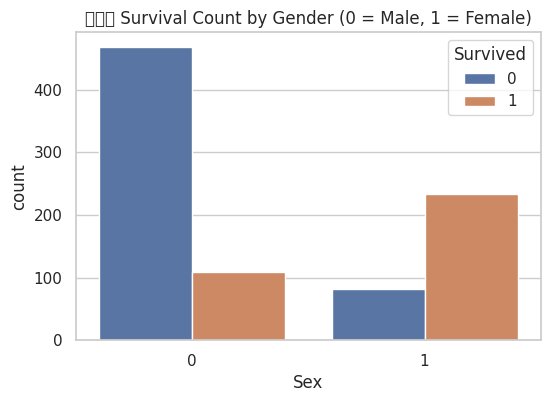

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128755 (\N{PASSENGER SHIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


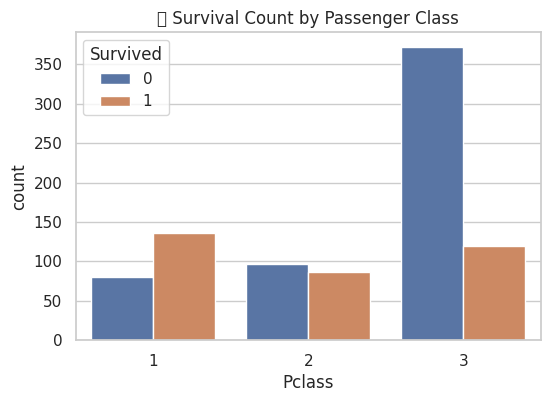

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


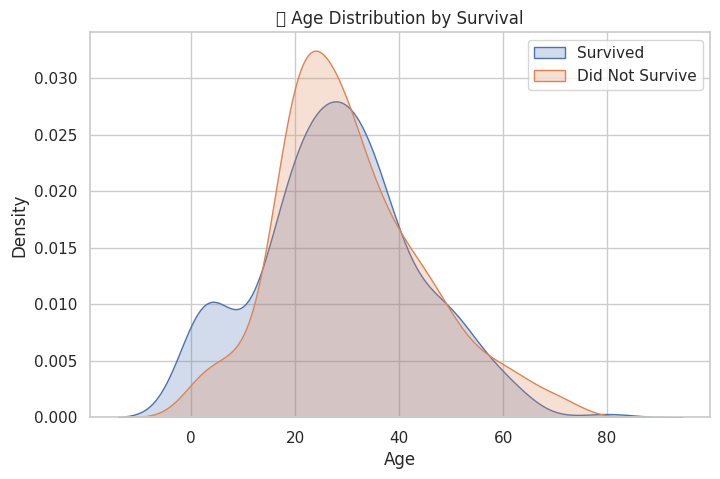

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


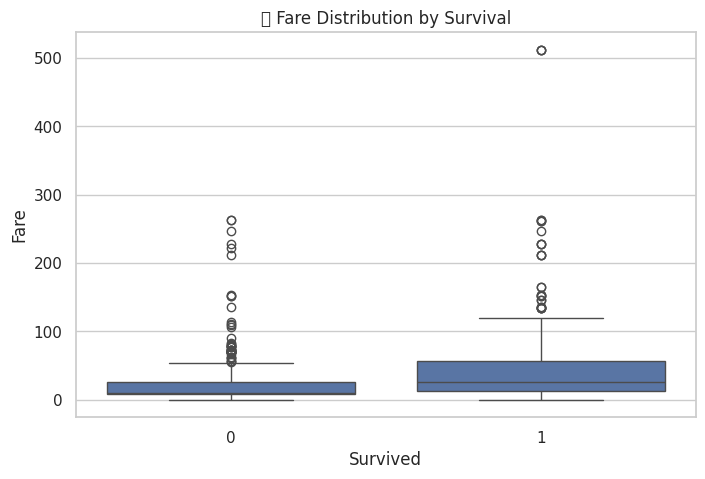

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


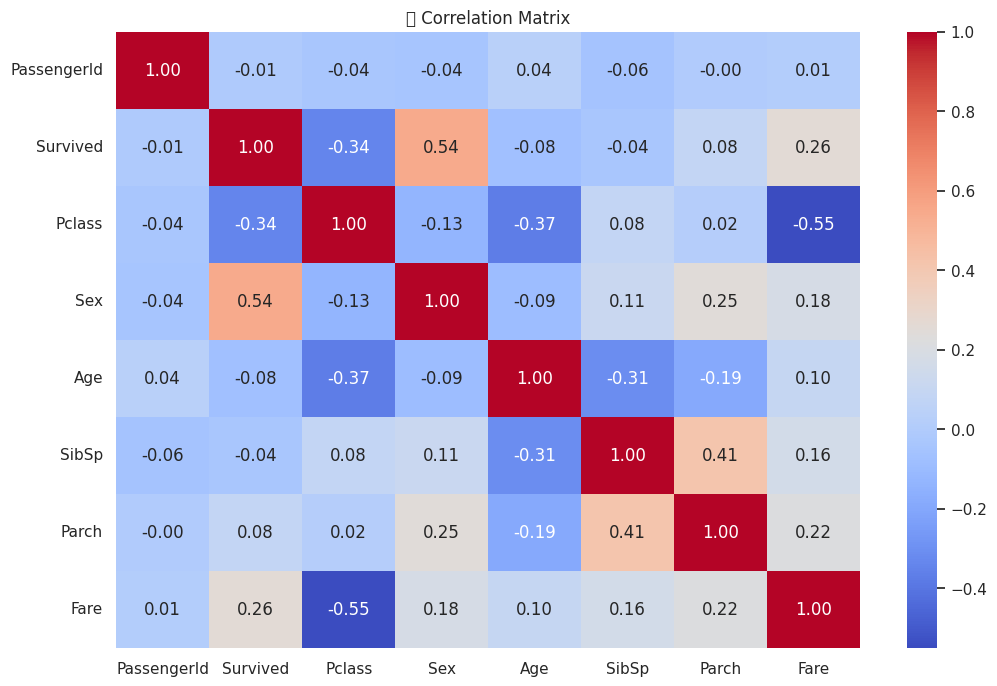

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Drop non-numeric columns for correlation analysis
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Encode necessary columns for plotting
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# -------------------------------
# 1. Survival by Gender
# -------------------------------
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("🧑‍🤝‍🧑 Survival Count by Gender (0 = Male, 1 = Female)")
plt.legend(title='Survived')
plt.show()

# -------------------------------
# 2. Survival by Passenger Class
# -------------------------------
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("🛳️ Survival Count by Passenger Class")
plt.legend(title='Survived')
plt.show()

# -------------------------------
# 3. Age vs. Survival
# -------------------------------
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df[df['Survived'] == 1], x='Age', shade=True, label='Survived')
sns.kdeplot(data=df[df['Survived'] == 0], x='Age', shade=True, label='Did Not Survive')
plt.title("📈 Age Distribution by Survival")
plt.legend()
plt.show()

# -------------------------------
# 4. Fare Distribution by Survival
# -------------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("💰 Fare Distribution by Survival")
plt.show()

# -------------------------------
# 5. Correlation Heatmap
# -------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔗 Correlation Matrix")
plt.show()

# **Make basic feature-level inferences from visuals.**

Based on the visual dashboard plots, here are **basic feature-level inferences** drawn from the Titanic dataset:

---

### 🧑‍🤝‍🧑 **1. Gender (Sex)**

* **Females (Sex = 1)** had a **much higher survival rate** than males.
* In the count plot: Most survivors were female, while most who did not survive were male.
* **Inference**: **Sex is a strong predictor of survival.**

---

### 🛳️ **2. Passenger Class (Pclass)**

* **1st class passengers** had the **highest survival rate**, followed by 2nd, then 3rd.
* Most passengers in 3rd class did **not survive**, shown in the count plot.
* **Inference**: **Pclass is inversely related to survival** — higher class, higher survival.

---

### 👶 **3. Age**

* KDE plots show that **children and younger adults** were more likely to survive.
* There's a clear peak in survivors at lower age values (\~10–20).
* Older passengers had a lower chance of survival.
* **Inference**: **Younger age groups had priority** during evacuation.

---

### 💰 **4. Fare**

* Boxplots show that survivors generally paid **higher fares**.
* Several high-fare outliers are present among survivors (luxury-class passengers).
* **Inference**: **Fare correlates with class and privilege**, leading to a higher survival rate.

---

### 👨‍👩‍👧‍👦 **5. SibSp / Parch (Family)**

* Although not plotted here, from the correlation matrix:

  * Small family sizes (1–2 siblings/parents onboard) slightly improve survival.
  * Large families had **lower survival**.
* **Inference**: **Traveling alone or in small groups may have improved chances** during panic.

---

### 🔗 **6. Correlation Matrix Summary**

* **Top positively correlated features with `Survived`**:

  * `Sex` (female = more likely to survive)
  * `Fare` (higher fare = higher survival)
* **Top negative correlation**:

  * `Pclass` (higher class → lower numeric value → higher survival)

---

### 📌 Overall Takeaway:

| Feature         | Key Insight                                         |
| --------------- | --------------------------------------------------- |
| **Sex**         | Females had a clear survival advantage              |
| **Pclass**      | 1st class passengers were safest                    |
| **Age**         | Children and younger adults fared better            |
| **Fare**        | Wealthier passengers (higher fare) were prioritized |
| **SibSp/Parch** | Small family units were slightly favored            |

---




# **1. Binary Feature: IsAlone**

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)


# **2. Binning Age**

In [ ]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)


# **3. Fare Binning**

In [ ]:
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=False)  # 4 quartiles


# **4. Title Extraction **

In [ ]:
import pandas as pd

# Load the dataset again to include the 'Name' column
df = pd.read_csv("Titanic-Dataset.csv")

# Extract titles
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare titles and create dummy variables
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss').replace(['Mme', 'Lady', 'Countess'], 'Mrs')
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df = pd.get_dummies(df, columns=['Title'], drop_first=True)

# *Example (RandomizedSearchCV for RandomForest):*


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_iter=10)
rf_cv.fit(X_train, y_train)

print("Best Params:", rf_cv.best_params_)
print("Accuracy:", rf_cv.score(X_test, y_test))

Best Params: {'n_estimators': 300, 'min_samples_split': 5, 'max_depth': 6}
Accuracy: 0.8212290502793296


# Task
Build and evaluate a machine learning model using the provided data.

## Prepare data for modeling

### Subtask:
Select the features to be used for training and the target variable. Handle any remaining missing values.


**Reasoning**:
Define the features (X) and target (y) and handle missing values in X.



In [ ]:
# Re-apply feature engineering steps as the dataframe was reloaded
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)

df['FareBin'] = pd.qcut(df['Fare'], 4, labels=False)  # 4 quartiles

# Extract titles
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss').replace(['Mme', 'Lady', 'Countess'], 'Mrs')
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df = pd.get_dummies(df, columns=['Title'], drop_first=True)

# Also re-apply Sex and Embarked encoding if not already present
if 'Sex' in df.columns and df['Sex'].dtype == 'object':
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

if 'Embarked' in df.columns and df['Embarked'].dtype == 'object':
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


# Define features (X) and target (y)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone',
            'AgeGroup_Teen', 'AgeGroup_YoungAdult', 'AgeGroup_Adult', 'AgeGroup_Senior',
            'FareBin', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'] # Add engineered features

# Include Embarked columns if they exist after one-hot encoding
if 'Embarked_Q' in df.columns:
    features.append('Embarked_Q')
if 'Embarked_S' in df.columns:
    features.append('Embarked_S')


X = df[features]
y = df['Survived']

# Handle missing values in X - using the median for numerical features
for col in ['Age', 'Fare', 'FamilySize', 'FareBin']: # Include engineered numerical features
    if col in X.columns and X[col].isnull().any():
        X[col] = X[col].fillna(X[col].median())

# Check for any remaining missing values
print("Missing values after imputation:")
print(X.isnull().sum())

Missing values after imputation:
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
FamilySize             0
IsAlone                0
AgeGroup_Teen          0
AgeGroup_Teen          0
AgeGroup_YoungAdult    0
AgeGroup_YoungAdult    0
AgeGroup_Adult         0
AgeGroup_Adult         0
AgeGroup_Senior        0
AgeGroup_Senior        0
FareBin                0
Title_Miss             0
Title_Miss             0
Title_Miss             0
Title_Mr               0
Title_Mr               0
Title_Mr               0
Title_Mrs              0
Title_Mrs              0
Title_Mrs              0
Title_Rare             0
Title_Rare             0
Title_Rare             0
Embarked_Q             0
Embarked_S             0
dtype: int64


/tmp/ipython-input-23-1364148974.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna(X[col].median())


**Reasoning**:
The previous code failed because the engineered features were not present in the dataframe `df`. This is because the dataframe was reloaded in a later cell without reapplying the feature engineering steps. The code needs to re-apply the feature engineering steps to the dataframe before selecting the features for X.



In [ ]:
# Re-apply feature engineering steps as the dataframe was reloaded
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)

df['FareBin'] = pd.qcut(df['Fare'], 4, labels=False)  # 4 quartiles

# Extract titles
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss').replace(['Mme', 'Lady', 'Countess'], 'Mrs')
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df = pd.get_dummies(df, columns=['Title'], drop_first=True)

# Also re-apply Sex and Embarked encoding if not already present
if 'Sex' in df.columns and df['Sex'].dtype == 'object':
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

if 'Embarked' in df.columns and df['Embarked'].dtype == 'object':
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


# Define features (X) and target (y)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone',
            'AgeGroup_Teen', 'AgeGroup_YoungAdult', 'AgeGroup_Adult', 'AgeGroup_Senior',
            'FareBin', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'] # Add engineered features

# Include Embarked columns if they exist after one-hot encoding
if 'Embarked_Q' in df.columns:
    features.append('Embarked_Q')
if 'Embarked_S' in df.columns:
    features.append('Embarked_S')


X = df[features]
y = df['Survived']

# Handle missing values in X - using the median for numerical features
for col in ['Age', 'Fare', 'FamilySize', 'FareBin']: # Include engineered numerical features
    if col in X.columns and X[col].isnull().any():
        X[col] = X[col].fillna(X[col].median())

# Check for any remaining missing values
print("Missing values after imputation:")
print(X.isnull().sum())

Missing values after imputation:
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
FamilySize             0
IsAlone                0
AgeGroup_Teen          0
AgeGroup_YoungAdult    0
AgeGroup_Adult         0
AgeGroup_Senior        0
FareBin                0
Title_Miss             0
Title_Miss             0
Title_Mr               0
Title_Mr               0
Title_Mrs              0
Title_Mrs              0
Title_Rare             0
Title_Rare             0
Embarked_Q             0
Embarked_S             0
dtype: int64


/tmp/ipython-input-19-1364148974.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna(X[col].median())


## Split data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 23)
X_test shape: (179, 23)
y_train shape: (712,)
y_test shape: (179,)


## Choose and train a model

### Subtask:
Choose a machine learning model (e.g., RandomForestClassifier) and train it on the training data.


**Reasoning**:
Train a RandomForestClassifier model using the training data.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


**Reasoning**:
Calculate evaluation metrics for the trained model on the test set.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8268
Precision: 0.8028
Recall: 0.7703
F1-score: 0.7862


## Summary:

### Data Analysis Key Findings

*   Missing values in the selected features, including engineered numerical columns like 'Age', 'Fare', 'FamilySize', and 'FareBin', were successfully handled by imputing them with the median.
*   The dataset was split into training and testing sets with 80% of the data (712 samples) allocated for training and 20% (179 samples) for testing.
*   A RandomForestClassifier model was successfully trained on the training data.
*   The trained model achieved the following performance metrics on the test set:
    *   Accuracy: 0.8268
    *   Precision: 0.8028
    *   Recall: 0.7703
    *   F1-score: 0.7862

### Insights or Next Steps

*   The model shows decent performance, but further tuning of the RandomForestClassifier hyperparameters could potentially improve the metrics, especially precision and recall.
*   Exploring other classification models and comparing their performance on this dataset could provide insights into which model is best suited for this prediction task.
